In [115]:
import numpy as np

In [116]:
K = [1,2]#стани

#можливі значеня мат. спод.
A1 = [0,1]#при к1
A2 = [2,3]#при к2

p_k1 = 1/3 #ймовірність  к1
p_k2 = 2/3 #ймовірність  к2

#реальні значення мат. спод. 
a1_real = 0
a2_real = 3

In [117]:
n = 100

# Генеруємо випадкові величини з мішаного нормального розподілу
X = np.random.choice([a1_real, a2_real], size=n, p=[p_k1, p_k2]) + np.random.normal(loc=0.0, scale=1.0, size=n)

C:\Users\Sofi\opencv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


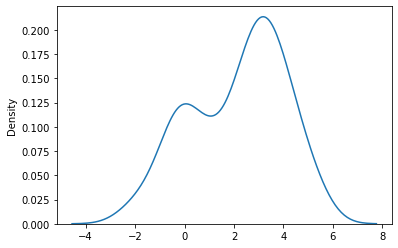

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(X, hist=False)

plt.show()

In [119]:
#Стартові значення

p1 = 0.5
p2 = 0.5

a1 = 1
a2 = 2

In [120]:
import math

def f(x,a):
    return ((math.exp(-(((x-a)**2)/2)))/np.sqrt(2*math.pi))

In [121]:
def L(A, Li):
    L_res = [sum([Li[i]*np.log(f(X[i],a)) for i in range(len(X))]) for a in A]
    print(L_res)
    return A[np.argmax(L_res)]

In [122]:
#Алгоритм самонавчання

def self_learning(a1,a2,p1,p2):
    L1 = [(p1*f(X[i],a1))/(p1*f(X[i],a1)+p2*f(X[i],a2)) for i in range(len(X))]                   
    L2 = [(p2*f(X[i],a2))/(p1*f(X[i],a1)+p2*f(X[i],a2)) for i in range(len(X))]  

    p1_1 = sum(L1)/len(X)
    p2_1 = sum(L2)/len(X)

    a1_1 = L([0,1], L1) #a={0,1}
    a2_1 = L([2,3], L2) #a={2,3}
    
    print("a1: ",a1, "a1_1: ",a1_1,"\na2: ",a2, "a2_1: ",a2_1, "\np1: ", p1, "p1_1: ", p1_1, "\nabs(p1_1-p1): ",abs(p1_1-p1), "\np2: ", p2, "p2_1: ", p2_1,"\nabs(p2_1-p2)",abs(p2_1-p2))

    if a1_1==a1 and a2_1==a2 and abs(p1_1-p1)<0.001 and abs(p2_1-p2)<0.001:
        print("Stop algoritm")
        return 
    else:
        print("continue")
        a1 = a1_1
        a2 = a2_1
        p1 = p1_1
        p2 = p2_1
        self_learning(a1,a2,p1,p2)

In [123]:
self_learning(a1,a2,p1,p2)

[-92.23330174228916, -87.70257765250294]
[-148.76101099072136, -110.3898016574455]
a1:  1 a1_1:  1 
a2:  2 a2_1:  3 
p1:  0.5 p1_1:  0.38871583962672085 
abs(p1_1-p1):  0.11128416037327915 
p2:  0.5 p2_1:  0.6112841603732794 
abs(p2_1-p2) 0.11128416037327937
continue
[-69.7477201149651, -78.49203463552865]
[-143.96824091275238, -90.86544399993959]
a1:  1 a1_1:  0 
a2:  3 a2_1:  3 
p1:  0.38871583962672085 p1_1:  0.39599858447265673 
abs(p1_1-p1):  0.0072827448459358846 
p2:  0.6112841603732794 p2_1:  0.6040014155273435 
abs(p2_1-p2) 0.007282744845935829
continue
[-47.290670005712336, -66.84516406145725]
[-150.5201922091451, -98.03773627615652]
a1:  0 a1_1:  0 
a2:  3 a2_1:  3 
p1:  0.39599858447265673 p1_1:  0.33884598189762855 
abs(p1_1-p1):  0.05715260257502819 
p2:  0.6040014155273435 p2_1:  0.6611540181023713 
abs(p2_1-p2) 0.057152602575027744
continue
[-45.52866576395331, -65.80162039893057]
[-151.67755308255562, -100.14119215056698]
a1:  0 a1_1:  0 
a2:  3 a2_1:  3 
p1:  0.338845